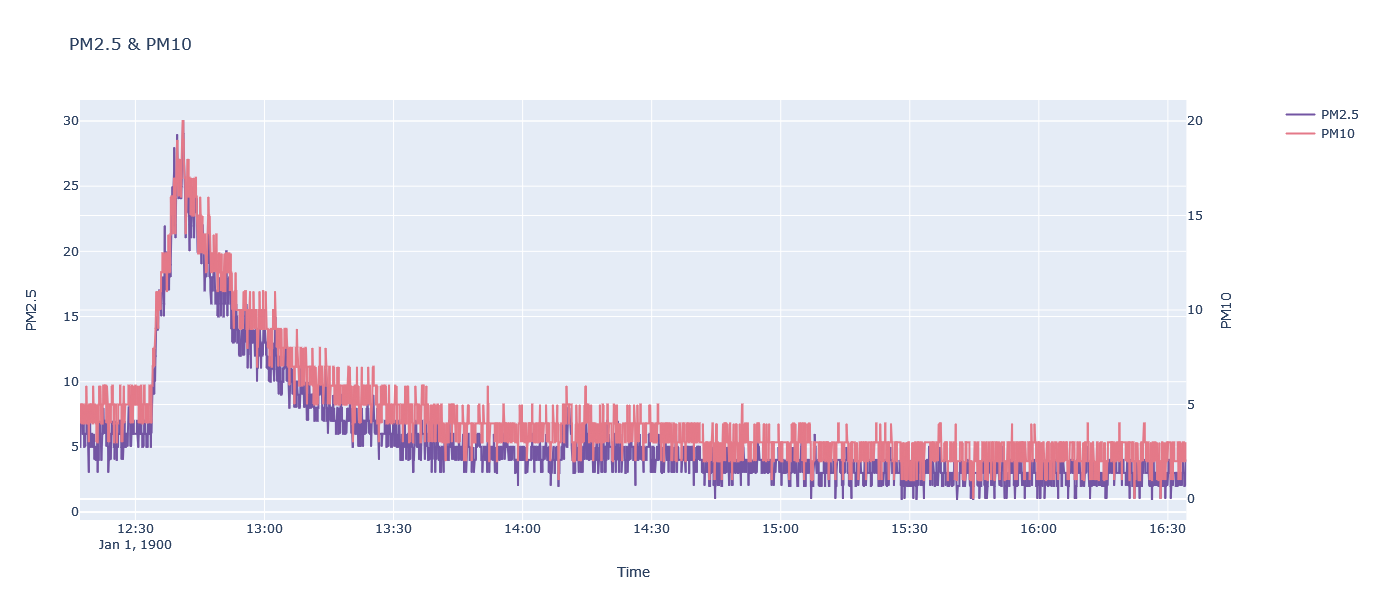

In [7]:
#plotting latest data of one day in plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import datetime
df = pd.read_csv("24Oct2021.csv",sep=",")
#convert Time string to datetime type
format = "%H:%M:%S"
def convert_datetime(dt_string):
    dt_object = datetime.datetime.strptime(dt_string, format)
    return dt_object

df['Zeit'] = df['Zeit'].apply(convert_datetime)
def plotting(df):
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add traces
    fig.add_trace(
        go.Scatter(x=df['Zeit'], y=df['PM25'], name="PM2.5", line=dict(color='#7355A3')),
        secondary_y=False,

    )

    fig.add_trace(
        go.Scatter(x=df['Zeit'], y=df['PM10'], name="PM10", line=dict(color='#E47988')),
        secondary_y=True,
    )

    # Add figure title
    fig.update_layout(
        title_text="PM2.5 & PM10",
        height=600
    )

    # Set x-axis title
    fig.update_xaxes(title_text="Time")

    # Set y-axes titles
    fig.update_yaxes(title_text="PM2.5", secondary_y=False)
    fig.update_yaxes(title_text="PM10", secondary_y=True)

    fig.show()

    
plotting(df)